In [4]:
using DataStructures
using Random
using DataFrames
using CSV
using Plots

In [5]:
mutable struct Deck
    queue::Deque{Vector{Int64}}
    function Deck(cards::Vector{Vector{Int64}})
        queue = Deque{Vector{Int64}}()
        for card ∈ cards
            push!(queue, card)
        end
        new(queue)
    end
end

function move(deck1::Deck, deck2::Deck, first_turn::Bool)
    card1 = popfirst!(deck1.queue)
    card2 = popfirst!(deck2.queue)
    # whose turn is it
    best_stat = 0
    if first_turn
        best_stat = argmax(card1)
    else
        best_stat = argmax(card2)
    end
    stat_1 = card1[best_stat]
    stat_2 = card2[best_stat]
    if stat_1 > stat_2
        push!(deck1.queue, card2)
        push!(deck1.queue, card1)
        return true
    else
        if stat_2 > stat_1
            push!(deck2.queue, card1)
            push!(deck2.queue, card2)
            return false
        else
            # random chance
            if rand() > 0.5
                # 1 wins
                push!(deck1.queue, card2)
                push!(deck1.queue, card1)
                return true
            else
                # 2 wins
                push!(deck2.queue, card1)
                push!(deck2.queue, card2)
                return false
            end
        end
    end
end

function make_game(cards::Vector{Vector{Int64}})::Tuple{Deck,Deck}
    deck1 = Vector{Vector{Int64}}()
    deck2 = Vector{Vector{Int64}}()
    order = shuffle(1:length(cards))
    n = Int(floor(length(cards) / 2))
    for i ∈ 1:n
        push!(deck1, cards[order[i]])
        push!(deck2, cards[order[i+n]])
    end
    return (Deck(deck1), Deck(deck2))
end

function run_game(cards::Vector{Vector{Int64}})
    Deck1, Deck2 = make_game(cards)
    turn::Bool = (rand() > 0.5)
    time = 0
    while (length(Deck1.queue) > 0) & (length(Deck2.queue) > 0)
        turn = move(Deck1, Deck2, turn)
        #print(length(Deck1.queue))
        #print("  ")
        #print(turn)
        #print("\n")
        time += 1
    end
    #if length(Deck2.queue) == 0
    #    return true
    #else
    #    return false
    #end
    return time
end


run_game (generic function with 1 method)

In [6]:
tyrants = DataFrame(CSV.File("tyrants.csv"));

In [7]:
tyrants

Row,Category,Group,Name,Region_Range,Birth_Year,Age_at_Power,Reign_Duration,Deaths,Territory_km2
,String3,String31,String31,String,Int64,Int64,Int64,Int64,Int64
1,A2,Könige,Herodes,Judäa 37–4 v. Chr.,-73,36,33,50000,20000
2,D1,Feldherren,Alexander der Große,Makedonien 336–323 v. Chr.,-356,20,13,500000,5200000
3,E3,Steppenkrieger,Kublai Khan,Mongolei/China 1260–1294,1215,44,34,18000000,33000000
4,B1,Kaiser,Sui Yangdi,China 604–618,569,35,14,8000000,4100000
5,F4,Usurpatoren,Maximilien de Robespierre,Erste Französische Republik 1793–1794,1758,35,1,40000,615000
6,H3,Sadisten,Mulai Ismail der Blutige,Marokko 1672–1727,1645,26,55,50000,1200000
7,H2,Sadisten,Peter der Grausame,Kastilien und León 1350–1369,1334,15,18,20000,330000
8,C4,Sultane & Kalifen,Aurangzeb,Indien 1658–1707,1618,39,49,4500000,3200000
9,F2,Usurpatoren,Nadir Schah,Persien 1736–1747,1688,47,11,1000000,4500000


In [8]:
age_at_power = tyrants.Age_at_Power
age_at_power_beats = [sum([age_at_power[i] < age_at_power[j] for j ∈ eachindex(age_at_power)]) for i ∈ eachindex(age_at_power)];

reign_duration = tyrants.Reign_Duration
reign_duration_beats = [sum([reign_duration[i] > reign_duration[j] for j ∈ eachindex(age_at_power)]) for i ∈ eachindex(age_at_power)];

deaths = tyrants.Deaths
deaths_beats = [sum([deaths[i] > deaths[j] for j ∈ eachindex(age_at_power)]) for i ∈ eachindex(age_at_power)]

territory = tyrants.Territory_km2
territory_beats = [sum([territory[i] > territory[j] for j ∈ eachindex(age_at_power)]) for i ∈ eachindex(age_at_power)]

birth = tyrants.Birth_Year
birth_beats = [sum([birth[i] < birth[j] for j ∈ eachindex(age_at_power)]) for i ∈ eachindex(age_at_power)]

27-element Vector{Int64}:
 21
 23
 12
 17
  1
  3
 11
  5
  2
  0
  ⋮
 14
 13
 16
  4
 24
  6
 15
  9
  8

In [9]:
cards = [
    [age_at_power_beats[i], reign_duration_beats[i], deaths_beats[i], territory_beats[i], birth_beats[i]] for i ∈ eachindex(birth_beats)
]

27-element Vector{Vector{Int64}}:
 [7, 16, 2, 0, 21]
 [19, 5, 13, 23, 23]
 [2, 17, 25, 26, 12]
 [8, 6, 22, 17, 17]
 [8, 0, 1, 6, 1]
 [15, 23, 2, 9, 3]
 [24, 9, 0, 4, 11]
 [6, 21, 21, 13, 5]
 [1, 3, 16, 21, 2]
 [11, 4, 19, 1, 0]
 ⋮
 [14, 14, 19, 14, 14]
 [2, 11, 26, 25, 13]
 [18, 12, 7, 24, 16]
 [24, 25, 18, 14, 4]
 [11, 24, 7, 5, 24]
 [0, 2, 12, 3, 6]
 [20, 21, 5, 9, 15]
 [26, 14, 15, 12, 9]
 [21, 20, 5, 2, 8]

In [10]:
T = [run_game(cards) for i ∈ 1:100000]

100000-element Vector{Int64}:
 13
 21
 39
 35
 83
 13
 51
 15
 31
 37
  ⋮
 35
 13
 55
 33
 13
 15
 21
 75
 15

### Time Distribution of Game Length

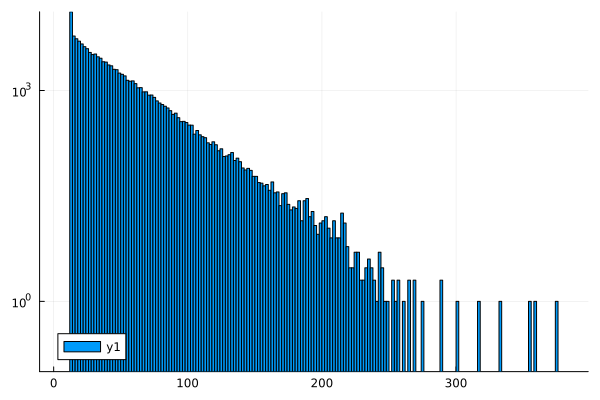

In [11]:
histogram(T, yscale=:log10, legend=:bottomleft)

Strickingly Exponential.

### Which Card Is best?

In [12]:
function make_game_with_assignment(cards::Vector{Vector{Int64}})
    deck1 = Vector{Vector{Int64}}()
    deck2 = Vector{Vector{Int64}}()
    order = shuffle(1:length(cards))
    n = Int(floor(length(cards) / 2))
    for i ∈ 1:n
        push!(deck1, cards[order[i]])
        push!(deck2, cards[order[i+n]])
    end
    return (Deck(deck1), Deck(deck2), order[1:n], order[n+1:2*n])
end

function winning_deck(cards::Vector{Vector{Int64}})
    Deck1, Deck2, start_deck_1, start_deck_2 = make_game_with_assignment(cards)
    turn::Bool = (rand() > 0.5)
    time = 0
    while (length(Deck1.queue) > 0) & (length(Deck2.queue) > 0)
        turn = move(Deck1, Deck2, turn)
        #print(length(Deck1.queue))
        #print("  ")
        #print(turn)
        #print("\n")
        time += 1
    end
    if length(Deck2.queue) == 0
        return start_deck_1
    else
        return start_deck_2
    end
end

winning_deck (generic function with 1 method)

In [13]:
WD = [winning_deck(cards) for i ∈ 1:100000]
wins = zeros(27)
for wd ∈ WD
    for c ∈ wd
        wins[c] += 1
    end
end

In [14]:
tyrants[!, :win_chance] = wins ./ 100000 * (27.0 / 26.0);

In [15]:
tyrants[sortperm(wins, rev=true), :]

Row,Category,Group,Name,Region_Range,Birth_Year,Age_at_Power,Reign_Duration,Deaths,Territory_km2,win_chance
,String3,String31,String31,String,Int64,Int64,Int64,Int64,Int64,Float64
1,G1,Gigantomane,Ramses der Große,Ägypten 1279–1213 v. Chr.,-1303,24,66,500000,1000000,0.559087
2,E3,Steppenkrieger,Kublai Khan,Mongolei/China 1260–1294,1215,44,34,18000000,33000000,0.556968
3,E2,Steppenkrieger,Dschingis Khan,Mongolei 1206–1227,1162,44,21,40000000,19000000,0.556802
4,G4,Gigantomane,Ludwig XIV.,Frankreich 1654–1715,1638,15,61,1500000,3400000,0.536127
5,C1,Sultane & Kalifen,Mehmed der Eroberer,Osmanisches Reich 1444–46 & 1451–81,1432,12,32,800000,2200000,0.530872
6,G2,Gigantomane,Nebukadnezar II.,Neubabylonisches Reich 605–562 v. Chr.,-634,29,57,250000,500000,0.510622
7,H2,Sadisten,Peter der Grausame,Kastilien und León 1350–1369,1334,15,18,20000,330000,0.509334
8,E4,Steppenkrieger,Tamerlan,Transoxanien 1370–1405,1336,34,35,17000000,4100000,0.506177
9,A1,Könige,Sanherib,Assyrisches Reich 705–681 v. Chr.,-745,40,24,250000,850000,0.503467


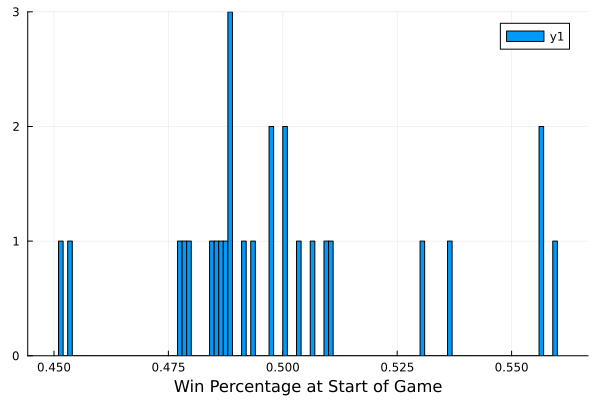

In [16]:
histogram(tyrants.win_chance, bins=100)
xlabel!("Win Percentage at Start of Game")